
# Clustering Human Activity using Inertial Sensors Data


## Note:
* Use the next cell to download the data directly, if that didn't work. you can download it manually (available at [UCI archive](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones)) a copy will also be available on Piazza.

* Don't change the part of the code that labels `#Do not change`

* Attach this notebook to your answer sheet with all outputs visible.
* make sure you have  `pytorch, scikit learn, pandas` in your environment


In [91]:

#### Download the dataset

import urllib.request
import zipfile
import os

dataset_url = "https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip"
zip_file_path = "Dataset.zip"
extracted_downloaded_folder = "Dataset"
extracted_data_folder = "UCI HAR Dataset"

if not os.path.exists(zip_file_path):
    print("Downloading the dataset...")
    urllib.request.urlretrieve(dataset_url, zip_file_path)

if not os.path.exists(extracted_downloaded_folder):
    print("Extracting the dataset...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(".")

if not os.path.exists(extracted_data_folder):
    print("Extracting the dataset...")
    with zipfile.ZipFile(extracted_data_folder +'.zip', 'r') as zip_ref:
        zip_ref.extractall(".")

print("Dataset is ready.")


Extracting the dataset...
Dataset is ready.


### Load the data into a dataframe


In [92]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Define paths to data files (relative to notebook location)
train_path = "UCI HAR Dataset/train/"
test_path = "UCI HAR Dataset/test/"
activity_mapper_path = "UCI HAR Dataset/activity_labels.txt"

# Load training and testing data
X_train = pd.read_csv(train_path + "X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv(train_path + "y_train.txt", delim_whitespace=True, header=None)
X_test = pd.read_csv(test_path + "X_test.txt", delim_whitespace=True, header=None)
y_test = pd.read_csv(test_path + "y_test.txt", delim_whitespace=True, header=None)

# Display the first 5 rows of the training dataframe
print("First 5 rows of training feature dataframe:")
X_train.head()  # DO NOT CHANGE

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_12060\967693543.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(train_path + "X_train.txt", delim_whitespace=True, header=None)
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_12060\967693543.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(train_path + "y_train.txt", delim_whitespace=True, header=None)
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_12060\967693543.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(test_path + "X_test.txt", delim_whitespace=True, header=None)


First 5 rows of training feature dataframe:


C:\Users\STUDENT\AppData\Local\Temp\ipykernel_12060\967693543.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = pd.read_csv(test_path + "y_test.txt", delim_whitespace=True, header=None)


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


#### scaling the data and PCA

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# TODO: Scale X_train
X_train_scaled = scaler.fit_transform(X_train)  # TODO

# TODO: Scale X_test
X_test_scaled = scaler.fit_transform(X_test)   # TODO

# # Convert scaled arrays back to DataFrames
X_train = pd.DataFrame(X_train_scaled)   # TODO
X_test = pd.DataFrame(X_test_scaled)


# Add 'Activity' column to create training_df and testing_df
# TODO: Combine X_train and y_train into a single DataFrame named training_df.
training_df = X_train.copy()
training_df['Activity'] = y_train

# TODO: Combine X_test and y_test into a single DataFrame named testing_df.
testing_df = X_test.copy()
testing_df['Activity'] = y_test


# Display the first 5 rows of the training feature dataframe
print("First 5 rows of training feature dataframe:")
training_df.head()  # DO NOT CHANGE


First 5 rows of training feature dataframe:


,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,Activity
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568,5
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875,5
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502,5
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714,5
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.138515,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225,5


In [94]:
from sklearn.decomposition import PCA

X_train_only = training_df.drop('Activity', axis=1)
# TODO perform PCA on the train data and get the first 2 PC
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_only)


#### Visualize the data

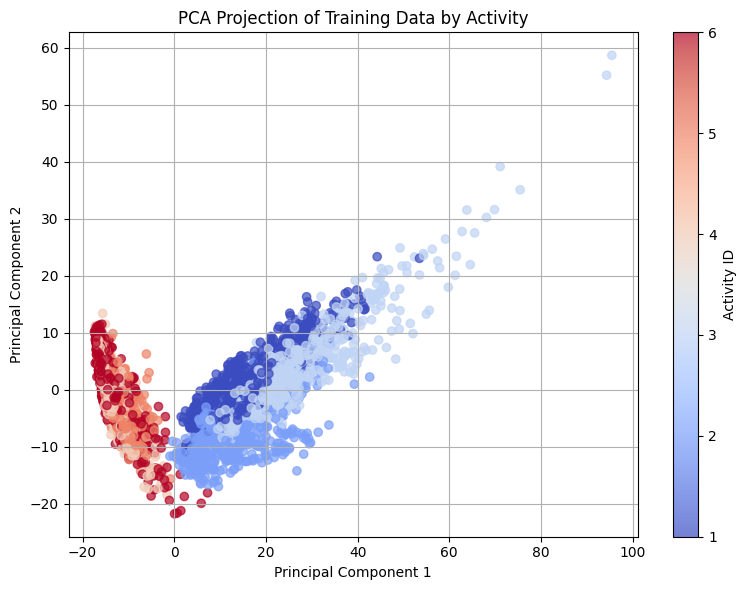

In [95]:
# Visualize training data using PCA


# Use the featre decoder to create Acitivtiy Name column

# Load activity labels
activity_labels = pd.read_csv(activity_mapper_path, header=None, sep='\s+', names=['id', 'activity_name'])

# Create mapping dictionary {1: "WALKING", 2: "WALKING_UPSTAIRS", ...}
activity_mapping = dict(zip(activity_labels['id'], activity_labels['activity_name']))

 # TODO use the mapping to decode the Activities labels
Activity_Name = training_df['Activity'].replace(activity_mapping)  # TODO

# TODO: Create a scatter plot using the X_train_pca and the Activity Names
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_train_pca[:, 0], X_train_pca[:, 1],
    c=training_df['Activity'],
    cmap='coolwarm', alpha=0.7
)

# Plot enhancements
plt.title("PCA Projection of Training Data by Activity")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, ticks=range(1, 7), label='Activity ID')
plt.grid(True)
plt.tight_layout()
# TODO <--code below-->

plt.show()



## Kmeans Clustering and The Optimal Number of Clusters

#### 1.  **Elbow Method**

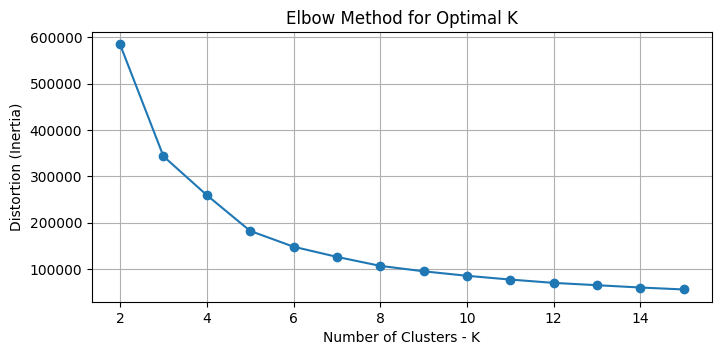

In [96]:
from sklearn.cluster import KMeans
# Elbow Method
distortion_values = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_train_pca)
    distortion_values.append(kmeans.inertia_)  # <-- distortion = inertia

# Plotting the Elbow Method
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 16), distortion_values, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters - K")
plt.ylabel("Distortion (Inertia)")
plt.grid()
plt.show()

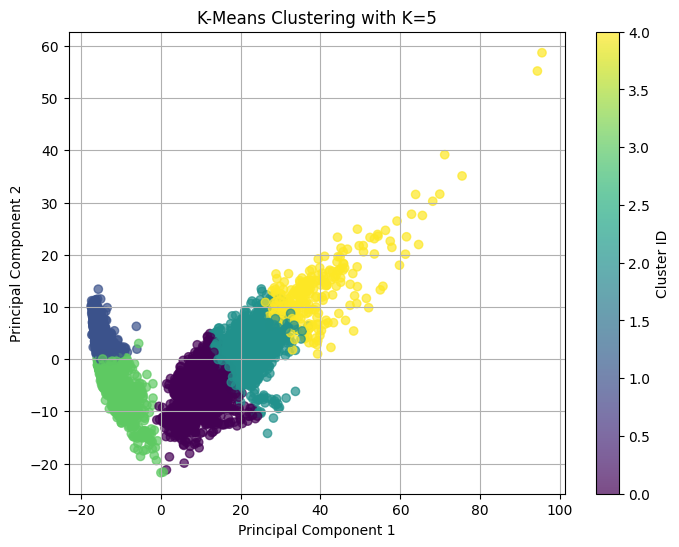

In [97]:
# Choose k based on the elbow method
elbow_k = 5 # TODO
kmeans_elbow = KMeans(n_clusters=elbow_k, random_state=42, n_init=10)
clusters_elbow = kmeans_elbow.fit_predict(X_train_only)

# TODO: PCA for visualization
pca = PCA(n_components=2) # TODO
X_train_pca_elbow =  pca.fit_transform(X_train_only) # TODO

# Plotting the clusters
plt.figure(figsize=(8, 6))
# TODO <--code below-->
scatter_elbow = plt.scatter(
    X_train_pca_elbow[:, 0], X_train_pca_elbow[:, 1],
    c=clusters_elbow, cmap='viridis', alpha=0.7
)
plt.title(f"K-Means Clustering with K={elbow_k}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter_elbow, label='Cluster ID')
plt.grid(True)
plt.show()



### 4.2a - Observation
As 𝑘 increases from 2 to 15, the distortion decreases monotonically. This is expected, as more clusters reduce the average distance between data points and their assigned cluster centers. However, the rate of decrease is steep initially and becomes more gradual after a certain point. Specifically, at k=5, an elbow is noticed on the plot and the distortion still decreases beyond this point, but the marginal improvement diminishes.


#### 2.  Adjusted Rand Index (ARI)

Best K based on ARI scores: 10


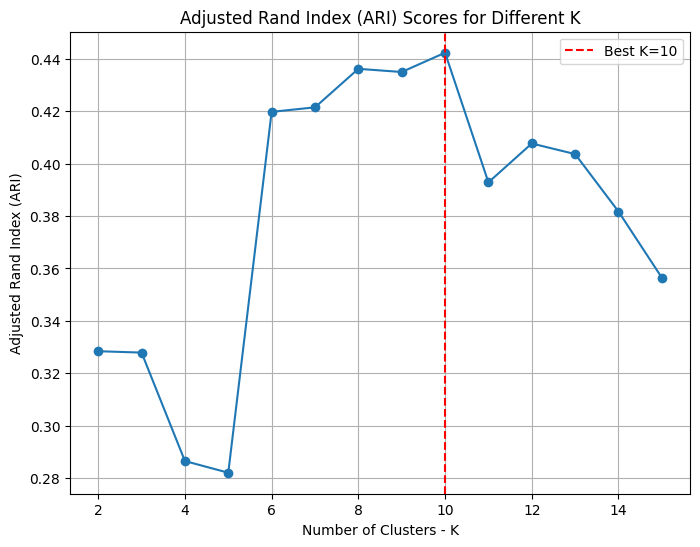

In [98]:
from sklearn.metrics import adjusted_rand_score
# 2. Adjusted Rand Index (ARI)
ari_scores = []
for k in range(2, 16):
    # TODO <--code below-->
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    # kmeans = KMeans(n_clusters=k,n random_state=0)
    clusters = kmeans.fit_predict(X_train_only)
    ari = adjusted_rand_score(training_df['Activity'].values, clusters)
    ari_scores.append(ari)

# Select the best K based on ARI scores
best_k = ari_scores.index(max(ari_scores)) + 2  # +2 because k starts from 2

print(f"Best K based on ARI scores: {best_k}")

# Plotting ARI Scores
plt.figure(figsize=(8, 6))
# TODO <--code below-->
plt.plot(range(2, 16), ari_scores, marker='o', linestyle='-')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best K={best_k}')
plt.title("Adjusted Rand Index (ARI) Scores for Different K")
plt.xlabel("Number of Clusters - K")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.legend()
plt.grid()
plt.show()



### 4.2b - Observation
From the plot it can be noticed that k decreased between 2 to 5 then started increasing while peaking at k = 10, then the ARI begins to decline again suggesting that further increasing the number of clusters leads to over-partitioning the data which will lead to reduction in alignment with the ground truth.

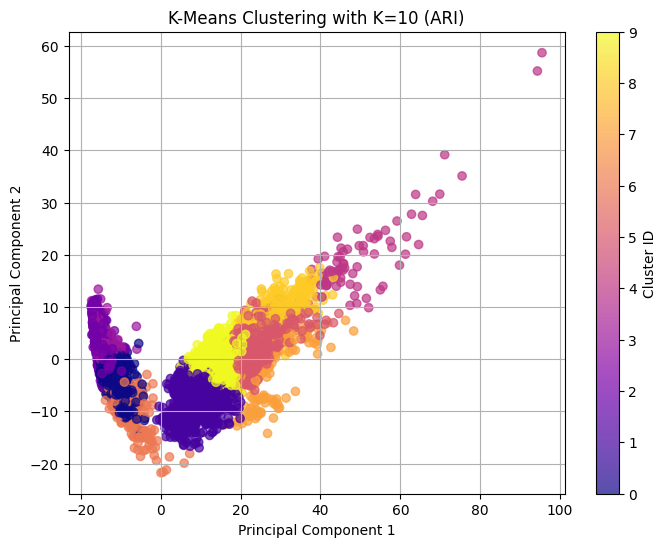

In [99]:
import numpy as np
# Choose k based on ARI
best_ari_k = np.argmax(ari_scores) + 2 # TODO
kmeans_ari = KMeans(n_clusters=best_ari_k, random_state=42, n_init=10)
clusters_ari = kmeans_ari.fit_predict(X_train)

# PCA for visualization
pca =  PCA(n_components=2) # TODO
X_train_pca_ari =  pca.fit_transform(X_train) # TODO


# Plotting the clusters
plt.figure(figsize=(8, 6))
# TODO <--code below-->
scatter_ari = plt.scatter(
    X_train_pca_ari[:, 0], X_train_pca_ari[:, 1],
    c=clusters_ari, cmap='plasma', alpha=0.7
)
plt.title(f"K-Means Clustering with K={best_ari_k} (ARI)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter_ari, label='Cluster ID')
plt.grid(True)
plt.show()



## Prototype Selection using K-means Clustering.

### 1. Random Selection

In [100]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def random_prototype_selection(X, y, n_samples):
    """
    Selects a random subset from the data. train a logistic regression model
    on the selected data.

    Args:
        X (pd.DataFrame): The input features.
        y (pd.Series): The target labels.
        n_samples(int): The number of samples to select from each class.

    Returns:
        tuple: A tuple containing the selected features (X_selected) and labels (y_selected).
    """
    data = pd.concat([X, y], axis=1)
    
    selected_samples = pd.DataFrame()
    
    for class_label in y.unique():
        class_samples = data[data[y.name] == class_label]
        selected = class_samples.sample(n=min(n_samples, len(class_samples)), 
                                   replace=False,
                                   random_state=np.random.RandomState())
        selected_samples = pd.concat([selected_samples, selected])
    
    # Split back into X and y
    X_selected = selected_samples.drop(columns=[y.name])
    y_selected = selected_samples[y.name]
    
    return X_selected, y_selected

n_repetitions = 10
accuracies = []
n_samples = 120

# Define X and y based on training_df
X = training_df.drop(columns=['Activity'])  # Features
y = training_df['Activity']  # Labels

for _ in range(n_repetitions):
    # Select random prototypes
    X_selected, y_selected = random_prototype_selection(X, y, n_samples)
    
    # Train logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_selected, y_selected)
    
    # Predict on test set (assuming X_test and y_test are defined)
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

average_accuracy = np.mean(accuracies)
print(f"Average Accuracy with Random Selection over {n_repetitions} repetitions: {average_accuracy:.4f}")

Average Accuracy with Random Selection over 10 repetitions: 0.9282


### 2. K-means Clustering by Class


In [101]:

# 2. K-means Clustering by Class
def kmeans_prototype_selection(X, y, n_prototypes_per_class):
    """
    Selects prototypes using K-means clustering for each class.

    Args:
        X (pd.DataFrame): The input features.
        y (pd.Series): The target labels.
        n_prototypes_per_class (int): The number of prototypes to select from each class.

    Returns:
        pd.DataFrame: The selected prototypes.
        pd.Series: The selected labels.
    """

    #Initialize lists to store selected prototypes and labels
    X_selected = []  # List to store selected feature subsets for each class
    y_selected = []  # List to store selected labels for each class


    # TODO:
      # Step 1: Iterate over each unique class label in the target labels
      # Step 2: for each class cluster its points using k = n_prototypes_per_class
      # Step 3: Find the closest points to each centroid
    # TODO <--code below-->
    for label in np.unique(y):
        # Step 1: Get all samples of this class
        X_class = X[y == label]

        # Step 2: KMeans clustering for this class
        kmeans = KMeans(n_clusters=n_prototypes_per_class, random_state=42, n_init=10)
        kmeans.fit(X_class)

        # Step 3: Find the closest point to each centroid
        from sklearn.metrics import pairwise_distances_argmin_min
        closest_indices, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X_class)

        # Append selected features and labels
        X_selected.append(X_class.iloc[closest_indices])
        y_selected.append(pd.Series([label] * n_prototypes_per_class))


    return pd.concat(X_selected, ignore_index=True), pd.concat(y_selected, ignore_index=True)



# Select prototypes using K-means
# X_train_selected_kmeans, y_train_selected_kmeans = kmeans_prototype_selection(X_train, y_train['Activity'], 20)
X_train_selected_kmeans, y_train_selected_kmeans = kmeans_prototype_selection(training_df.drop("Activity", axis=1),
                                                                                  training_df["Activity"], 20)
# Train Logistic Regression model
logistic_regression_kmeans = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression_kmeans.fit(X_train_selected_kmeans, y_train_selected_kmeans)

# Make predictions and calculate accuracy
y_pred_kmeans = logistic_regression_kmeans.predict(X_test)
accuracy_kmeans = accuracy_score(y_test, y_pred_kmeans)
print(f"Accuracy with K-means Selection: {accuracy_kmeans:.4f}")



Accuracy with K-means Selection: 0.9091


### Q. 4.3b - Random selection vs K-Means
The model trained on randomly selected prototypes slightly outperformed the one using K-means-based selection, with an average accuracy of 0.9306 compared to 0.9091. While K-means ensures diverse coverage by selecting from distinct clusters, it may miss borderline or high-variance examples that are important for classification. Random selection, especially when repeated, is more likely to include such informative points, which could explain its better performance in this case.

## Autoencoder for Features Learning.


### 1.  Data Preparation:

In [102]:
import glob
import numpy as np

# Load data with proper tensor formatting
def load_inertial_data(path):
    files = glob.glob(path)
    data_dict = {}
    for f in files:
        name = f.split('\\')[-1][:-4]
        # Read as numpy array and convert to float32
        data_dict[name] = pd.read_csv(f, sep='\s+', header=None).values.astype(np.float32)
    return data_dict

# Load training data
train_data = load_inertial_data("UCI HAR Dataset/train/Inertial Signals/*.txt")
train_labels = pd.read_csv("UCI HAR Dataset/train/y_train.txt", header=None)[0].values

# Load Test data
test_data = load_inertial_data("UCI HAR Dataset/test/Inertial Signals/*.txt")
test_labels = pd.read_csv("UCI HAR Dataset/test/y_test.txt", header=None)[0].values

print(train_data.keys())
print(f"Train Data Dictionary keys: {list(train_data.keys())}")
print(f"For each sensor the Data shape: {train_data['body_acc_x_train'].shape}")

dict_keys(['body_acc_x_train', 'body_acc_y_train', 'body_acc_z_train', 'body_gyro_x_train', 'body_gyro_y_train', 'body_gyro_z_train', 'total_acc_x_train', 'total_acc_y_train', 'total_acc_z_train'])
Train Data Dictionary keys: ['body_acc_x_train', 'body_acc_y_train', 'body_acc_z_train', 'body_gyro_x_train', 'body_gyro_y_train', 'body_gyro_z_train', 'total_acc_x_train', 'total_acc_y_train', 'total_acc_z_train']
For each sensor the Data shape: (7352, 128)


In [103]:
import torch
from torch.utils.data import Dataset, DataLoader

# Create PyTorch Dataset
class SensorsDataset(Dataset):
    def __init__(self, data_dict, labels):
        # Stack all signals along the feature dimension  Shape: (num_samples, 128, num_features)
        self.data = torch.tensor(np.stack([data_dict[key] for key in sorted(data_dict.keys())], axis=-1)) # TODO
        self.labels = torch.tensor(labels - 1)  #TODO

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Create dataset and dataloader
# Ensure that the cell defining `train_data` is executed before running this cell.
train_dataset = SensorsDataset(train_data, train_labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True) # TODO: create pytorch dataloader with Batch sie 32, and shuffle

# Verify shapes
sample, label = next(iter(train_loader))
print(f"Input shape: {sample.shape}")  # Should be (batch_size, 128, 9)
print(f"Label shape: {label.shape}")   # Should be (batch_size)


Input shape: torch.Size([32, 128, 9])
Label shape: torch.Size([32])



#### 2. Autoencoder Implementation

In [ ]:
import torch.nn as nn
# 2. Autoencoder Implementation
class TimeSeriesAE(nn.Module):
    def __init__(self, input_size=9, hidden_size = 64, encoding_dim=64):
        super().__init__()
        # Encoder
        self.encoder = nn.GRU(input_size=input_size, hidden_size=hidden_size, batch_first=True, bidirectional=True) # TODO: bidirectional GRU with proper hidden layer size
        self.enc_fc = nn.Linear(hidden_size * 2, encoding_dim) # TODO: fully connected layer for the encoder (output encoder_dim)

        # Decoder
        self.dec_fc = nn.Linear(encoding_dim, hidden_size * 2) # TODO: fully connected layer for the decoder
        self.decoder = nn.GRU(input_size=hidden_size * 2, hidden_size=hidden_size, batch_first=True, bidirectional=True) # TODO: bidirectional GRU with proper input and hidden layer size
        self.output_layer = torch.nn.Linear(hidden_size * 2, input_size) # fully connected layer for the output ( ouput is the input size)
        # note The input is is hidden_size*2 for bidirectional

    def forward(self, x):
        # Encoding
        _, hidden = self.encoder(x)
        hidden = torch.cat([hidden[-2], hidden[-1]], dim=1)  # Combine bidirectional
        encoded = self.enc_fc(hidden)

        # Decoding
        decoded = self.dec_fc(encoded).unsqueeze(1).repeat(1, x.size(1), 1)
        out, _ = self.decoder(decoded)
        reconstructed = self.output_layer(out)

        return reconstructed, encoded



# Instantiate the model
input_size = 9  # Number of features
hidden_size = 64

model = TimeSeriesAE(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss() # TODO
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # TODO

# TODO: Train loop for the autoencoder
loss_history = []
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_X, _ in train_loader:
        # TODO <--code below-->
        optimizer.zero_grad()
        reconstructed, _ = model(batch_X)
        loss = criterion(reconstructed, batch_X)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_loader)
    loss_history.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

# Plotting the accuracy vs epcoh
plt.figure(figsize=(8, 6))
# TODO <--code below-->
# Plotting the loss vs epoch
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), loss_history, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Training Loss (MSE)")
plt.title("Autoencoder Training Loss Over Epochs")
plt.grid(True)
plt.show()

Epoch 1/10, Loss: 0.0591
Epoch 2/10, Loss: 0.0517
Epoch 3/10, Loss: 0.0497
Epoch 4/10, Loss: 0.0476
Epoch 5/10, Loss: 0.0449
Epoch 6/10, Loss: 0.0417
Epoch 7/10, Loss: 0.0399


### 3. Embedding Extraction and Visualization

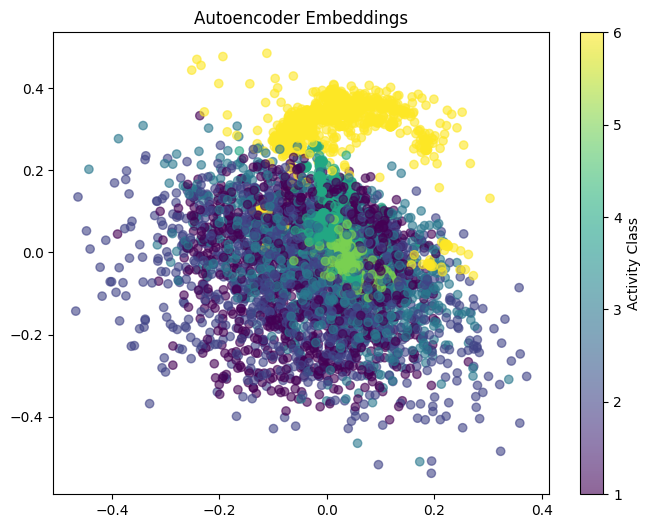

In [ ]:
ae_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)

# Extract embeddings for the training data
model.eval()
embeddings = []
train_labels = []
with torch.no_grad():
    for batch_X ,labels in ae_loader:
      # TODO <--code below-->
      _, encoded = model(batch_X)
      embeddings.append(encoded.cpu().numpy())
      train_labels.extend(labels.cpu().numpy()) 

embeddings = np.concatenate(embeddings, axis=0)

# Create a scatter plot of the 2D embeddings
plt.figure(figsize=(8, 6))
activities = np.unique(y_train)
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=y_train.values, cmap='viridis', alpha=0.6)
plt.colorbar(label='Activity Class')
plt.title('Autoencoder Embeddings')
plt.show()


### 4. Adjusted Rand Index (ARI) for the embeddings


<Figure size 800x600 with 0 Axes>

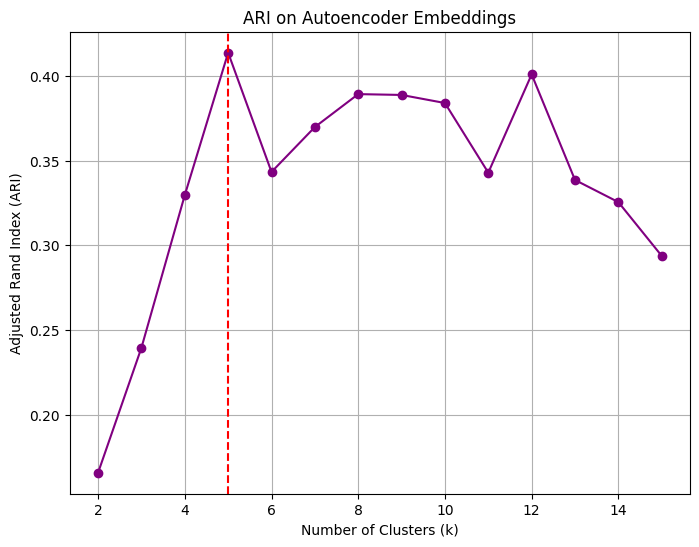

In [ ]:
ari_scores = []
for k in range(2, 16):
    # TODO <--code below-->
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(embeddings)
    ari = adjusted_rand_score(train_labels, cluster_labels)
    ari_scores.append(ari)

# Plotting ARI Scores
plt.figure(figsize=(8, 6))
# TODO <--code below-->
plt.figure(figsize=(8, 6))
plt.plot(range(2, 16), ari_scores, marker='o', color='purple')
plt.axvline(x=np.argmax(ari_scores) + 2, color='red', linestyle='--', label='Best K')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.title("ARI on Autoencoder Embeddings")
plt.grid(True)
plt.show()



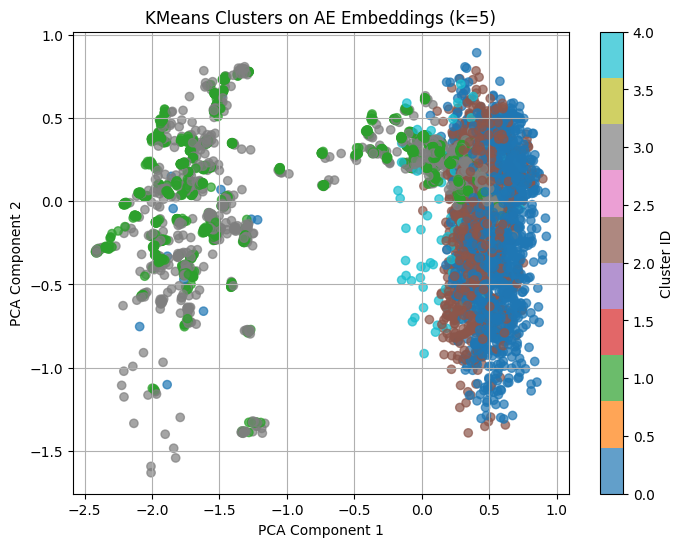

In [ ]:
# Choose k based on ARI
best_embedd_ari_k = np.argmax(ari_scores) + 2  
# print(f"Best ARI score at k = {best_embedd_ari_k}") # TODO
kmeans_ari = KMeans(n_clusters=best_embedd_ari_k, random_state=42, n_init=10)
clusters_ari = kmeans_ari.fit_predict(X_train)

# PCA for visualization
pca =  PCA(n_components=2) # TODO
X_train_pca_ari =  pca.fit_transform(embeddings) # TODO


# Plotting the clusters
plt.figure(figsize=(8, 6))
# TODO <--code below-->
plt.scatter(X_train_pca_ari[:, 0], X_train_pca_ari[:, 1], c=clusters_ari, cmap='tab10', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"KMeans Clusters on AE Embeddings (k={best_embedd_ari_k})")
plt.colorbar(label="Cluster ID")
plt.grid(True)
plt.show()


